# PCA 실습

## iris data

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


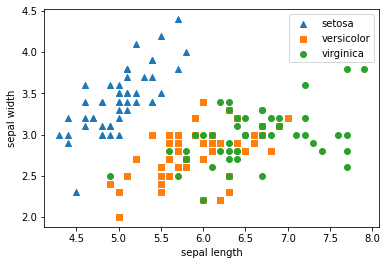

In [2]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

pca = PCA()
pca = pca.fit(iris_scaled)
print(pca.explained_variance_ratio_) # 각 주성분이 차지하는 변동성 비율

irisDF = pd.DataFrame({'Variance':pca.explained_variance_ratio_, 'n_components':range(1,5)})
irisDF

[0.72962445 0.22850762 0.03668922 0.00517871]


,Variance,n_components
0,0.729624,1
1,0.228508,2
2,0.036689,3
3,0.005179,4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


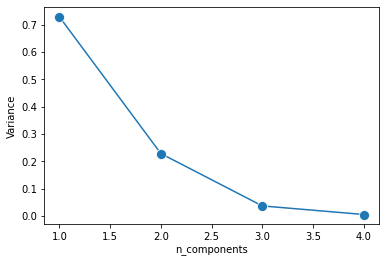

In [4]:
sns.lineplot('n_components','Variance', data = irisDF, marker='o', markersize=10)
plt.show()

In [5]:
iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [7]:
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


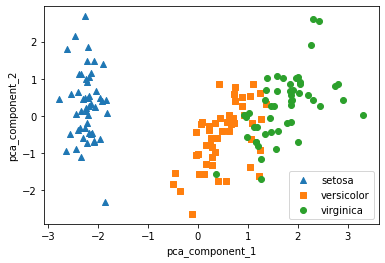

In [9]:
markers = ['^','s','o']

for i , marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도: ',scores)
print('원본 데이터 평균 정확도: ',np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


In [12]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도: ', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도:  0.88


## 신용카드 고객 데이터

In [13]:
df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features=df.drop('default', axis=1)

In [15]:
corr = X_features.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


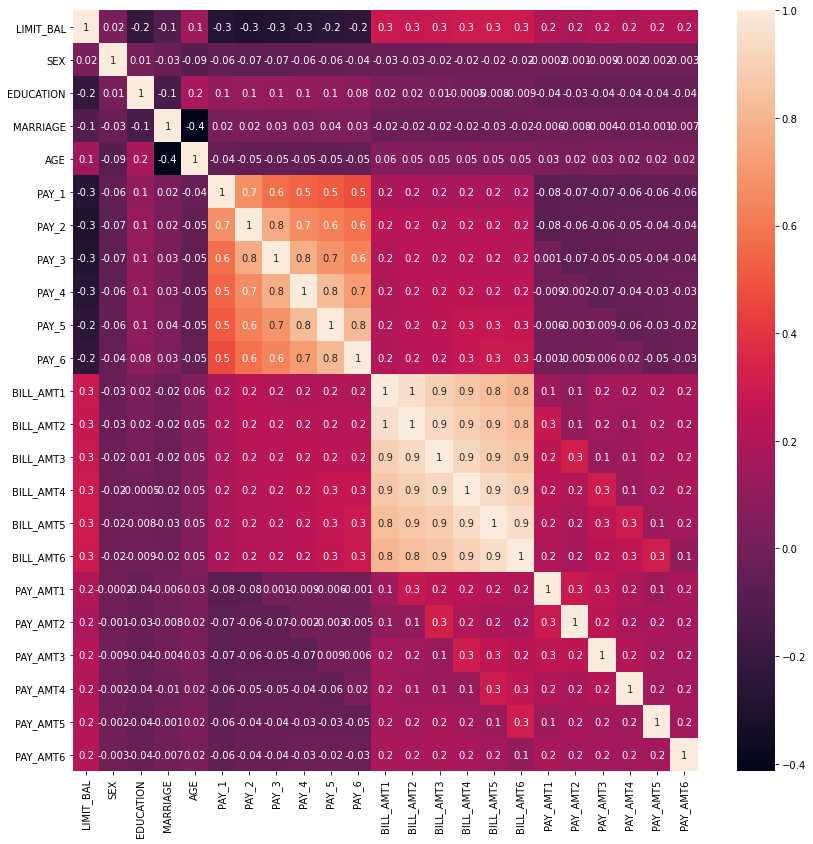

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

In [17]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [18]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90555253 0.0509867 ]


In [19]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('cv=3인 경우의 개별 fold 세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

cv=3인 경우의 개별 fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('cv=3인 경우의 개별 fold 세트별 정확도:',scores_pca)
print('평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

cv=3인 경우의 개별 fold 세트별 정확도: [0.7907 0.7961 0.8025]
평균 정확도:0.7964


# LDA 실습

## iris data

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target
irisDF_lda

,lda_component_1,lda_component_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


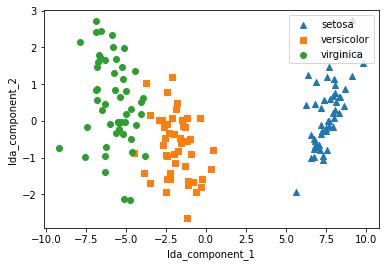

In [3]:
markers = ['^','s','o']
for i , marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='upper right'); plt.xlabel('lda_component_1'); plt.ylabel('lda_component_2')
plt.show()

# SVD 실습

In [4]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
U,Sigma,Vt = svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('Vt matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
Vt matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [6]:
# 원본행렬로 복원
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [7]:
# 로우간 의존성이 있는 경우
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [8]:
U,Sigma,Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [9]:
# 원본 행렬로 복원

U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(U_,np.dot(Sigma_,Vt_))
print(np.round(a,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [10]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
matrix = np.random.random((6,6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape, '\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape, '\nTruncated SVD Sigma값 행렬:', Sigma_tr)

matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)
print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.24575605 0.22573721 0.03827786 0.58098021 0.82925331 0.77326256]
 [0.94693849 0.73632338 0.67328275 0.74517176 0.51161442 0.46920965]
 [0.6439515  0.82081228 0.14548493 0.01806415 0.38009078 0.42034243]
 [0.78146479 0.85605231 0.71129867 0.05546416 0.59424128 0.65574127]
 [0.07337714 0.0726814  0.01782185 0.2450048  0.49606654 0.38797335]
 [0.06239287 0.86778144 0.41956915 0.46921129 0.99127066 0.99148226]]

분해 행렬 차원: (6, 6) (6,) (6, 6) 
Sigma값 행렬: [3.21882118 1.11468965 0.67781872 0.40698332 0.29562045 0.0512155 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6) 
Truncated SVD Sigma값 행렬: [0.40698332 0.67781872 1.11468965 3.21882118]

Truncated SVD로 분해 후 복원 행렬:
 [[ 0.22885832  0.26939164  0.01412926  0.60854956  0.82994662  0.73958918]
 [ 0.96669771  0.68550887  0.70327118  0.70989465  0.52829438  0.49134034]
 [ 0.67620905  0.73789961  0.19477048 -0.04009715  0.41060347  0.45323547]
 [ 0.72867813  0.99172521  0.63059897  0.15072376  0.54382806  0.60238982]
 [ 0.05190992  0.12742

In [11]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TruncatedSVD Component2')

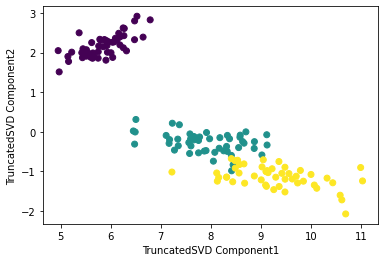

In [12]:
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component1')
plt.ylabel('TruncatedSVD Component2')

Text(0.5, 1.0, 'PCA Transformed')

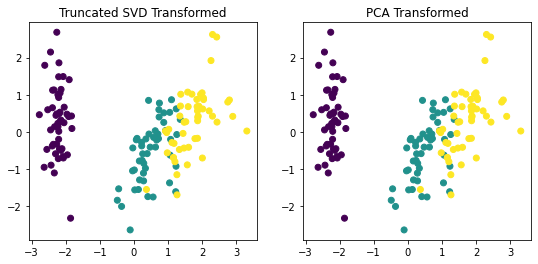

In [13]:
# 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 해 보자

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1,ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)

ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

# NMF 실습

Text(0, 0.5, 'NMF Component2')

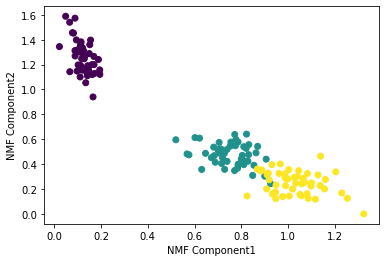

In [15]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2, max_iter=1000 )
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component1')
plt.ylabel('NMF Component2')